<a href="https://colab.research.google.com/github/saileshraturi/Regression-using-TensorFlow/blob/master/Regression_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
!wget http://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

URL transformed to HTTPS due to an HSTS policy
--2020-04-19 01:29:48--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-19 01:29:48 (43.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [8]:
!ls

moore.csv  sample_data


In [0]:
data = pd.read_csv('moore.csv',header=None).values

In [10]:
data.shape

(162, 2)

In [0]:
X = data[:,0].reshape(-1,1)# keras api expect a tensor 2 D array
y = data[:,1]

In [12]:
X.shape

(162, 1)

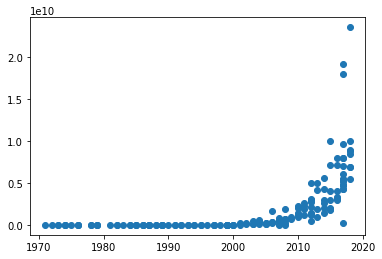

In [13]:
plt.scatter(X,y)

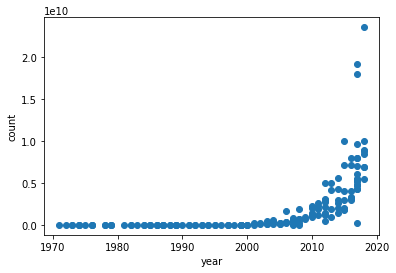

In [0]:
plt.xlabel("year")
plt.ylabel("count")
plt.scatter(X,y)

In [0]:
Y = np.log(y)

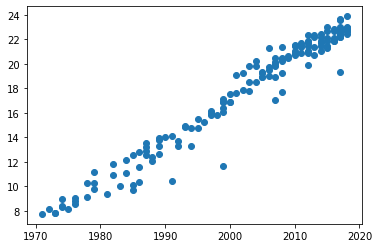

In [15]:
plt.scatter(X,Y)

In [0]:
X = X-X.mean()

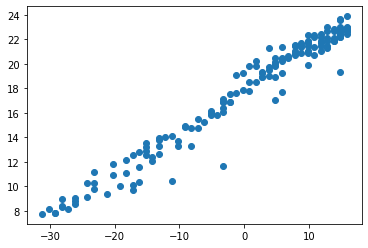

In [19]:
plt.scatter(X,Y)

In [20]:
#Build the model for regression #No Sigmoid in Regression 

model = tf.keras.models.Sequential([
                                   tf.keras.layers.Input(shape = (1)),
                                    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001,0.9),loss= 'mse')

def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

 #Train the model

r = model.fit(X,Y,epochs = 200, callbacks=[scheduler])   

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 309.5775 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 344.8924 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 259.4547 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 201.4172 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 138.8929 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 117.0408 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 96.0793 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 71.7490 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 54.3565 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 49.1021 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 3

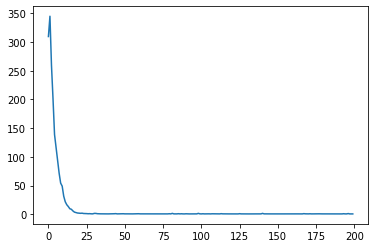

In [21]:
plt.plot(r.history['loss'],label = 'loss')

In [23]:
#Get the slope of line
# get the weights of layer
print(model.layers)

In [24]:
print(model.layers[0].get_weights()) # returns two array first is weight and second is b

[array([[0.3392335]], dtype=float32), array([17.770773], dtype=float32)]


In [0]:
#slope of the line is 

a = model.layers[0].get_weights()[0][0,0]

In [26]:
a

0.3392335

# Predict the Test





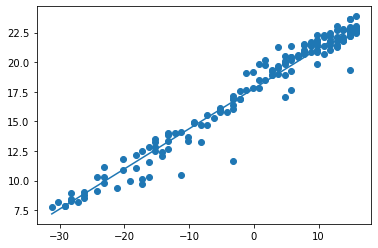

In [29]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

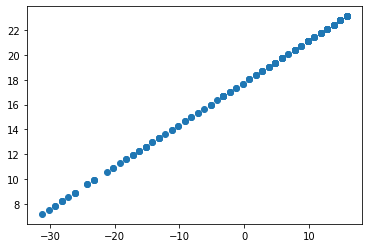

In [31]:
plt.scatter(X,Yhat)

In [0]:
#Manual Prediction

w,b = model.layers[0].get_weights()

In [33]:
print(w,b)

[[0.3392335]] [17.770773]


In [34]:
type(X)

numpy.ndarray

In [0]:
Yhatm = (X.dot(w) + b).flatten()

In [38]:
print(Yhatm)

[ 7.18752573  7.52675921  7.8659927   7.8659927   8.20522619  8.20522619
  8.20522619  8.54445968  8.88369317  8.88369317  8.88369317  9.56216014
  9.56216014  9.90139363  9.90139363  9.90139363 10.57986061 10.91909409
 10.91909409 11.25832758 11.59756107 11.59756107 11.93679456 11.93679456
 11.93679456 12.27602804 12.27602804 12.27602804 12.61526153 12.61526153
 12.61526153 12.61526153 12.95449502 12.95449502 13.29372851 13.29372851
 13.29372851 13.29372851 13.632962   13.97219548 13.97219548 14.31142897
 14.31142897 14.65066246 14.65066246 14.98989595 14.98989595 15.32912944
 16.68606339 15.32912944 15.66836292 16.00759641 16.00759641 16.00759641
 16.3468299  16.68606339 16.68606339 17.02529687 17.02529687 16.68606339
 16.68606339 16.68606339 17.02529687 17.36453036 17.36453036 17.70376385
 18.38223083 18.38223083 18.72146431 19.0606978  18.72146431 19.0606978
 19.39993129 19.73916478 18.04299734 18.04299734 17.70376385 18.72146431
 18.72146431 19.0606978  19.39993129 18.04299734 19.

In [41]:
np.allclose(Yhat,Yhatm)

True